In [1]:
# suppress tensorflow logging, usually not useful unless you are having problems with tensorflow or accessing gpu
import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# globally useful libraries / namespaces for this notebook
import numpy as np
import matplotlib.pyplot as plt

# notebook wide settings for plotting visualizations
plt.rcParams['figure.figsize'] = (10, 8) # set default figure size, 10in by 8in

# Chapter 2: The Mathematical Building Blocks of Neural Networks

Supporting materials for:

Chollet (2021). *Deep Learning with Python*. 2nd ed. Manning Publications Co.
[Amazon](https://www.amazon.com/Learning-Python-Second-Fran%C3%A7ois-Chollet/dp/1617296864/ref=sr_1_1?crid=32NFM2SBCJVQQ)

Understanding deep learning requires familiarity with many simple mathematical
concepts: tensors, tensor operations, differentiation, gradient descent, and so on.
Out goal in this notebook/chapter is to build up your intiution about these mathematical
concepts without getting over technical.

One note about the term tensors.  **Tensor** is a mathematical term that simply can be used to refer
to a matrix of values, no matter how many dimensions.  Thus a 1-dimensional vector or a 2-dimensional
matrix are both *Tensors*, as well as 3-dimensional or higher matrices.  Vectorized programming
could also be referred to as tensor programming, but the term vectorized programming was coined
before the term tensor was in common use.  Another difference is that the term Tensor programming
and Tensor libraries have come to mean the types of vectorized or tensor operations we usually think of, but
it also includes libraries that can automatically differentiate such tensors with respect to
a loss function.  We will get to these concepts in a bit more detail below.



## Note: Installing Keras/TensorFlow

For this textbook we are using the `TensorFlow` library and mostly accessing the `Keras`
neural network and deep learning API through the `TensorFlow`.  You will need to have
a recent version of `Tensorflow/Keras` installed on your machine and available to your
iPython kernel to run this notebook.  At the time of creation of this notebook, 
`TensorFlow/Keras` is no longer supported directly by the `Conda` package manager.  You
should be doing a `pip install` command of `TensorFlow` to correctly get the 
most recent `TensorFlow` libraries with the `Keras` API available:

```
$ python3 -m pip install 'tensorflow'
```

If you have a suitable Nvidia GPU processor available on your your machine, you can get the `cuda` libraries
setup and installed for `TensorFlow` by doing:

```
python3 -m pip install 'tensorflow[and-cuda]'
```

See the official [Install TensorFlow 2](https://www.tensorflow.org/install) for more detailed information about correctly
getting `TensorFlow/Keras` installed on your system. [Install TensorFlow with pip](https://www.tensorflow.org/install/pip) 
has information on installing cuda/Nvidia.


# 2.4 The Engine of Neural Networks: Gradient-based Optimization

Each layer of a (dense / basic) neural network transforms the inputs to the layer into the layer outputs using the following expression / method:

\begin{equation}
\text{output} = \text{relu}(\text{dot}(\text{input}, W) + b)
\end{equation}

Here $W$ is a matrix of the layer weights (which summarize the linear transformations on the input values) and $b$ is a vector of bias terms (which as we saw
performs a type of translation).  Other activation functions than `relu()` can be used, for example a standard nonlinear sigmoid function, among others.  But
usually then after the weighted sum transformation of the inputs and addition of the bias, the results are put through a nonlinear output activation function
to get the final output result for the layer.

In this expression $W$ and $b$ are tensors that are attributes of the layer.  They're called the *weights* or *trainable parameters* of the layer. These
trainable parameters are modified by some training algorithm (e.g. gradient descent optimization) in order to learn a good mapping that correctly
transforms inputs into outputs for the layer.

Initially these weight matrices are filled with small random values (*random initializaiton*).  There is no reason to expect that the function will yield
a correct result initially when $W$ and $b$ are random.  The resulting representations / transformations are meaningless.  Gradually these weights 
will be adjusted, based on a feedback signal, to produce better representations that transform the input to the desired output.  This gradual adjustment
is called *training*, and is the learning that machine learning is all about.

Training happens within a *training loop* for some number of *epochs* of training. Repeat these steps in a loop until the *loss*
seems sufficiently low.

1. Draw a batch of training samples, $x$, and corresponding targets $y_true$.
2. Run the model on $x$ (a step called the *forward pass*) to obtain predictions, $y_pred$.
3. Compute the *loss* of the model on the batch (using a *loss function* or also called *fitness function*), a measure of
   the mismatch between $y_pred$ and $y_true$.
4. Update all weights of the model in a way that slightly reduces the loss on this batch.

And rinse and repeat until the loss is no longer being reduced sufficiently (called *convergence* of the training loop.

Step 1 is as simple as slicing an array of the input tensor to get a batch for training (or more usually, selecting a random sample to perform the batch).  Steps 
2 and 3 can be done with tensor operations of the same type as we have just been looking at.

Step 4 is the difficult part, how do we update a model's weights so that it reduces the calculated loss on this batch of data, where the loss again is a measure of
how close the prediction outputs are to the true outputs we desire the model to produce.

**Gradient descent** is an iterative optimization technique that powers modern neural networks.  Here is the gist of it.  All of the linear transformations transform
the inputs in a smooth or continuous way.  Mathematically this means that these functions are *differentiable*.  If you chain together such functions the resulting
bigger function is still smooth and thus still differentiable.  In particular this also applies to the loss function that maps the coefficients (or weights)
of the model to the loss of the model on a batch of data: a small change in the model's coefficients results in a small, predictable change in the loss value.
This enables you to use a mathematical operator called the *gradient* to describe how the loss varies as you move the model's coefficients, and allows you to move
them in a direction that decreases loss.

## 2.4.1 What's a Derivative

The lecture notebook titled Calculus Review has some more details and review of the concept of derivatives and gradients.

In short, the *derivitive* of function $f$ at some point $f(x)$ is equivalent to the (instantenous) slope of the function at that point.
A positive derivative (or slope) means that a small increase in $x$ results in an increase of $f(x)$.  A negative derivative
means a small increase in $x$ results in a decrease of $f(x)$.  This is important because the sign of the derivative, if it is the
derivative of the loss function, tells you which direction you need to change the parameters $x$ in order to decrease the
loss function.  The absolute value of the derivitive (the *magnitude* of the derivative) tells you how quickly this increase
or decrease will happen.

Being able to determine the derivative of functions is a very powerful tool when it comes to *optimization*, the task of finding
values of $x$ that minimize the value of $f(x)$.  If the function you are optimizing is the loss function, by minimizing the loss
function $f(x)$ you will find the parameter (or weight) values that will give the best outputs for the function inputs (e.g. the ones that
will minimize the loss when transforming the inputs to the $y_pred$ outputs.

If you are trying to update $x$ by a factor $epsilon_x$ in order to minimize $f(x)$, and you know the derivative of $f$, then your job is done:
the derivative completely describes how $f(x)$ evolves as you change $x$.  If you want to reduce the value of $f(x)$, you just need to move
$x$ a little in the opposite direction from the derivative.

As a quick example, the derivative, or slope, of the function $x^2$ at $x = 2$ can be found in the limit as we compute the slope for
smaller and smaller values of $\Delta x$:

slope when x changes from 2 to 5:  7.0
slope when x changes from 2 to 4:  6.0
slope when x changes from 2 to 3:  5.0
slope when x changes from 2 to 2.5:  4.099999999999998
slope at x=2.000000 for deltax=1.0000000000000000 is:5.0000000000000000
slope at x=2.000000 for deltax=0.1000000000000000 is:4.1000000000000014
slope at x=2.000000 for deltax=0.0100000000000000 is:4.0099999999998914
slope at x=2.000000 for deltax=0.0010000000000000 is:4.0009999999996992
slope at x=2.000000 for deltax=0.0001000000000000 is:4.0001000000078335
slope at x=2.000000 for deltax=0.0000100000000000 is:4.0000100000270322
slope at x=2.000000 for deltax=0.0000010000000000 is:4.0000010006480116
slope at x=2.000000 for deltax=0.0000001000000000 is:4.0000000911533098


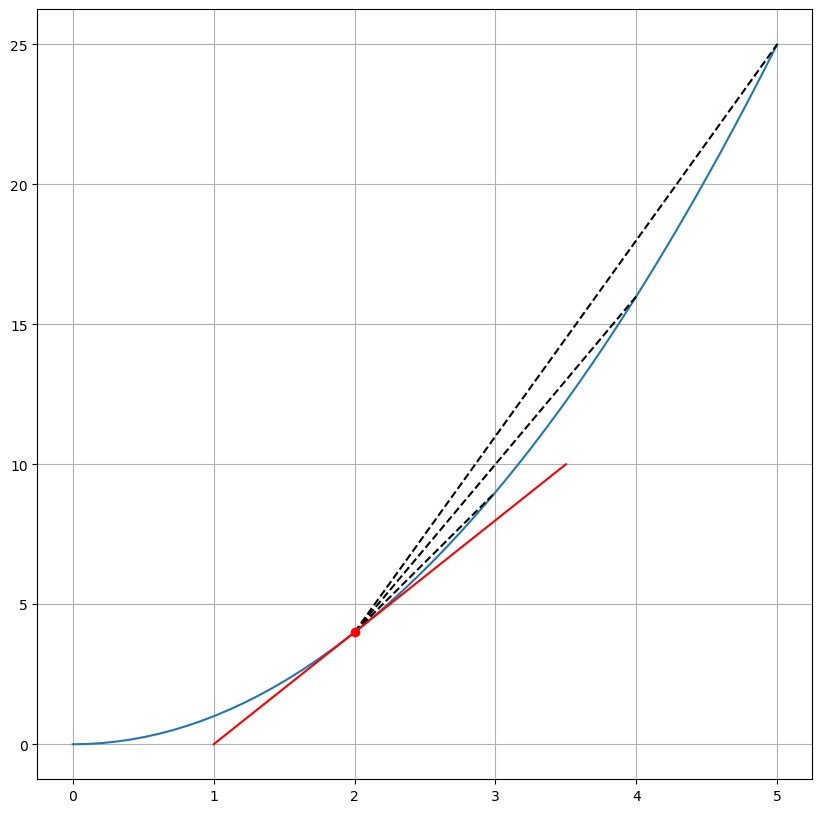

In [2]:
def f(x):
    return x**2

plt.figure(figsize=(10,10))
x = np.linspace(0, 5)
plt.plot(x, f(x));


# slope when x changes from 2 to 5 is
deltay = f(5.0) - f(2.0)
deltax = 5.0 - 2.0
m = deltay / deltax
print("slope when x changes from 2 to 5: ", m)
plt.plot([2.0, 5.0], [f(2.0), f(5.0)], 'k--')

# slope when x changes from 2 to 4 is
deltay = f(4.0) - f(2.0)
deltax = 4.0 - 2.0
m = deltay / deltax
print("slope when x changes from 2 to 4: ", m)
plt.plot([2.0, 4.0], [f(2.0), f(4.0)], 'k--')

# slope when x changes from 2 to 3 is
deltay = f(3.0) - f(2.0)
deltax = 3.0 - 2.0
m = deltay / deltax
print("slope when x changes from 2 to 3: ", m)
plt.plot([2.0, 3.0], [f(2.0), f(3.0)], 'k--')

# slope when x changes from 2 to 3 is
deltay = f(2.1) - f(2.0)
deltax = 2.1 - 2.0
m = deltay / deltax
print("slope when x changes from 2 to 2.5: ", m)
plt.plot([2.0, 2.1], [f(2.0), f(2.1)], 'k--')

# plot the tangent line, instantaneous slope is 4
# instantaneous slope (derivative) is 4, so line is y = 4x + b that goes through point (2,4), so y = 4x -4
# plot tangent at x=1.5 to x=3.5
x1 = 1.0
y1 = 4 * x1 - 4
x2 = 3.5
y2 = 4 * x2 - 4
plt.plot([x1, x2], [y1, y2], 'r-')
plt.plot(2, 4, 'ro');
plt.grid();

# example of slope as delta x decreases from 1 in powers of 10
x = 2
deltax = 10

for i in range(8):
    deltax = deltax / 10
    deltay = f(x + deltax) - f(x)
    m = deltay / deltax
    print("slope at x=%f for deltax=%0.16f is:%0.16f" % (x, deltax, m))

This is the fundamental idea behind the definition of the derivative, as the slope of the function in the limit when $\Delta x \rightarrow 0$.
\begin{equation}
m_{\text{tan}} = \lim\limits_{\Delta x \to 0} \frac{\Delta y}{\Delta x} = \lim\limits_{\Delta x \to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x} 
\end{equation}


In conclusion.  If you're trying to update `x` by a factor `epsilon_x` in order to minimize $f(x)$,
and you know the derivative of $f$, then your job is done: the derivative completely describes how $f(x)$
evolves as you change `x`.  If you want to reduce the value of $f(x)$, you just need to move `x` a little
in the opposite direction from the derivative.

## 2.4.2 Derivative of a Tensor Operation: The Gradient

The derivative of a tensor operation (or tensor function) is called a *gradient*.  Gradients are just the generalization of the
concept of derivatives to functions that take tensors as inputs.  

For a scalar function the derivative represents the *local slope* of the curve of the function.  In the same way, the gradient of
a tensor function represents the *curvature* of the multidimensional surfice described by the function.  It describes how the ouput of
the functions varies when its input parameters vary.

In machine learning (e.g. for a linear regression) consider:

- An input vector, $x$ (a sample in a dataset)
- A matrix, $W$ (the weights of a model, in our machine learning class we often refered to the weights as the theta or $\theta$ parameters of the model).
- A target, $y\_true$ (what the model should learn to associate to $x$).
- a loss function, `loss` (meant to measure the gap between the model's current predictions and $y_true$)

We can use $W$ (and $b$) to compute the target candidate $y\_pred$, and then compute the loss, or mismatch, between the 
target candidate $y\_pred$ and the target $y\_true$:

```
y_pred = W @ X + b
loss_value = loss(y_pred, y_true)
```

Given fixed inputs $x$ and $y\_true$ the preceeding can be interpreted as a function mapping values of $W$ to the loss values:

```
loss_value = f(W)
```

The derivative of $f$ at the point $W0$ is a tensor:

```
grad(loss_value, W0)
```

This can be interpreted as the tensor describing the *direction of steepest ascent* of `loss_value = f(W)` around $W0$. Each
partial derivative describes the slope of $f$ in a specific direction.

You can reduce the `loss_value = f(W)` by moving $W$ in the opposite direction from the gradient.  For example:

```
W1 = W0 - step * grad(f(W0), W0)
```

where `step` is a small scaling factor.  The scaling factor `step` is needed because `grad(loss_value, W0)` only approximates the
curvature when you're close to $W0$.


## 2.4.3 Stochastic Gradient Descent

## 2.4.4 Chaining Derivatives: The Backpropagation Algorithm